In [7]:
!python compile.py

running build_ext
building 'image_processing' extension
clang++ -fno-strict-overflow -DNDEBUG -O2 -Wall -fPIC -O2 -isystem /opt/anaconda3/envs/data/include -arch arm64 -fPIC -O2 -isystem /opt/anaconda3/envs/data/include -arch arm64 -I/opt/anaconda3/envs/data/lib/python3.12/site-packages/pybind11/include -Iscripts -I/opt/anaconda3/envs/data/include/python3.12 -c scripts/bind.cpp -o build/temp.macosx-11.0-arm64-cpython-312/scripts/bind.o -std=c++11
clang++ -fno-strict-overflow -DNDEBUG -O2 -Wall -fPIC -O2 -isystem /opt/anaconda3/envs/data/include -arch arm64 -fPIC -O2 -isystem /opt/anaconda3/envs/data/include -arch arm64 -I/opt/anaconda3/envs/data/lib/python3.12/site-packages/pybind11/include -Iscripts -I/opt/anaconda3/envs/data/include/python3.12 -c scripts/image.cpp -o build/temp.macosx-11.0-arm64-cpython-312/scripts/image.o -std=c++11
clang++ -fno-strict-overflow -DNDEBUG -O2 -Wall -fPIC -O2 -isystem /opt/anaconda3/envs/data/include -arch arm64 -fPIC -O2 -isystem /opt/anaconda3/envs/d

In [1]:
from modules import *

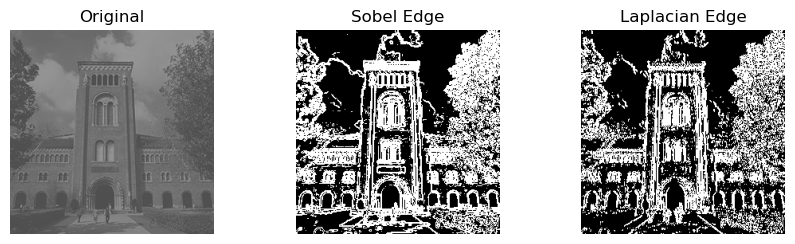

In [ ]:
# Edge Detection
building_img = Image(256, 256, 1)
building_img.load("images/HW2/building.raw")

building_sobel_edge = Image.sobel_edge(building_img, 1, 3, 30)
building_laplacian_edge = Image.laplacian_edge(building_img, 1, 3, 20)

show_images([building_img, building_sobel_edge, building_laplacian_edge], ["Original", "Sobel Edge", "Laplacian Edge"])